<a href="https://colab.research.google.com/github/sanjeev1996/IIT_MUMBAI/blob/master/wiener_filter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
filter1 = np.zeros((840,1600))
degraded_frame = cv2.imread('screenshot+contrast.png',0)
Degraded = cv2.imread('degraded.png',0)
print(Degraded.shape)
original = cv2.imread('original.png',0)
print(original.shape)
original =  np.fft.fft2(original)
Degraded =  np.fft.fft2(Degraded)
filter =  (1/5)*np.array(([0,0,0,0,0],
                   [0,0,0,0,0],
                   [1,1,1,1,1],
                   [0,0,0,0,0],
                   [0,0,0,0,0]))
filter =  np.fft.fft2(filter,(840,1600))
Original =   degraded_frame/filter1
Original =  np.fft.ifft2(Original)
cv2_imshow(Original)

'''
#Degraded1 =  np.fft.fft2(Degraded_1[:,:])
#filter =  np.fft.fft2(filter, Degraded1.shape)
Original =  (Degraded1 / filter)
Original = np.fft.ifft2(Original)
save[:,:] = (Original)
save = (save.astype(int))
cv2_imshow(save)
'''

In [0]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
import cv2

im = cv2.imread('Original.png',0)
im1 = np.zeros((2*im.shape[0], 2*im.shape[1]))
#print(im.shape, im1.shape)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im1[2*i,2*j] = im[i,j]
 
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector
 
# the LPF kernel
kernel = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0.25, 0.25, 0.25, 0.25, 0.25], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
print(len(kernel))
# enlarge the kernel to the shape of the image
kernel = np.pad(kernel, (((im1.shape[0]-5)//2,(im1.shape[0]-5)//2+1), ((im1.shape[1]-5)//2,(im1.shape[1]-5)//2+1)), padwithzeros) 
print(kernel) 

 
freq = fp.fft2(im1)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
freq_LPF = freq*freq_kernel # by the Convolution theorem
im2 = fp.ifft2(freq_LPF)
cv2_imshow(im2)
''' 
plt.subplot(2,3,1)
plt.imshow(im)
plt.title('Original Image', size=20)
plt.subplot(2,3,2)
plt.imshow(im1)
plt.title('Padded Image', size=20)
plt.subplot(2,3,3)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int), cmap='jet')
plt.title('Original Image Spectrum', size=20)
plt.subplot(2,3,4)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int), cmap='jet')
plt.title('Image Spectrum of the LPF', size=20)
plt.subplot(2,3,5)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_im2))).astype(int), cmap='jet')
plt.title('Image Spectrum after LPF', size=20)
plt.subplot(2,3,6)
plt.imshow(im2.astype(np.uint8)) # the imaginary part is an artifact
plt.title('Output Image', size=20)
'''

In [0]:
im = cv2.imread('lena.jpg',0)
im = cv2.imread('Original.png',0)
im1 = cv2.imread('screenshot+contrast.png',0)
im2 = np.zeros((im1.shape))
im2[:720,:1280] = im
im = im2
# create the motion blur kernel
size = 15
kernel = np.zeros((size, size))
kernel[:,int((size-1)/2) ] = np.array([size])
kernel = kernel / size

kernel = np.pad(kernel, (((im.shape[0]-size)//2,(im.shape[0]-size)//2+1), ((im.shape[1]-size)//2,(im.shape[1]-size)//2+1)), padwithzeros)

freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved1 = freq*freq_kernel
im_blur = fp.ifft2(convolved1).real
im_blur = im_blur / np.max(im_blur)
#cv2.imwrite('deblur.png', im_blur) 
#im_blur = im1
epsilon = 10**-6
freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel)
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = im_restored / np.max(im_restored)

convolved = fp.fft2(im_restored)
freq = fp.fft2(im)
kernel = freq/convolved
freq_kernel = fp.ifft2(fp.fftshift(kernel))
freq_kernel = abs(freq_kernel.real)/freq_kernel.max()
print(freq_kernel.shape)




'''
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(im)
plt.title('Original image', size=20)
plt.axis('off')
plt.subplot(222)
plt.imshow(im_blur)
plt.title('Blurred image with motion blur kernel', size=20)
plt.axis('off')
plt.subplot(223)
plt.imshow(im_restored)
plt.title('Restored image with inverse filter', size=20)
plt.axis('off')
plt.subplot(224)
plt.imshow(im_blur)
plt.title('Restored image with inverse filter', size=20)
plt.axis('off')
print(im_restored)
'''
# Plot the surface of the frequency responses here

(840, 1600)


"\nplt.figure(figsize=(18,12))\nplt.subplot(221)\nplt.imshow(im)\nplt.title('Original image', size=20)\nplt.axis('off')\nplt.subplot(222)\nplt.imshow(im_blur)\nplt.title('Blurred image with motion blur kernel', size=20)\nplt.axis('off')\nplt.subplot(223)\nplt.imshow(im_restored)\nplt.title('Restored image with inverse filter', size=20)\nplt.axis('off')\nplt.subplot(224)\nplt.imshow(im_blur)\nplt.title('Restored image with inverse filter', size=20)\nplt.axis('off')\nprint(im_restored)\n"

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Degraded = cv2.imread('screenshot+contrast.png', 0)
Degraded_img = Degraded
temp = cv2.imread('Original.png', 0)
Original_img = np.zeros(Degraded.shape)
Original_img[:720,:1280] = temp
filter1 = np.zeros((20,20))
Degraded_1 = cv2.imread('screenshot1+contrast.png', 0)

save = np.zeros(Degraded_1.shape)

for i in range(1):
        Original =  Original_img 
        Degraded =  Degraded_img
        cv2_imshow(Original[505:515,505:515])
'''                
        Original =  np.fft.fft2(Original)
        Degraded =  np.fft.fft2(Degraded)
        filter = (Degraded / Original)
        #filter =  np.fft.ifft2(filter, (20,20))
        
        Degraded1 =  np.fft.fft2(Degraded_1[:,:])
        #filter =  np.fft.fft2(filter, Degraded1.shape)
        Original =  (Degraded1 / filter)
        Original = np.fft.ifft2(Original)
        save[:,:] = (Original)
save = (save.astype(int))
cv2_imshow(save)
'''

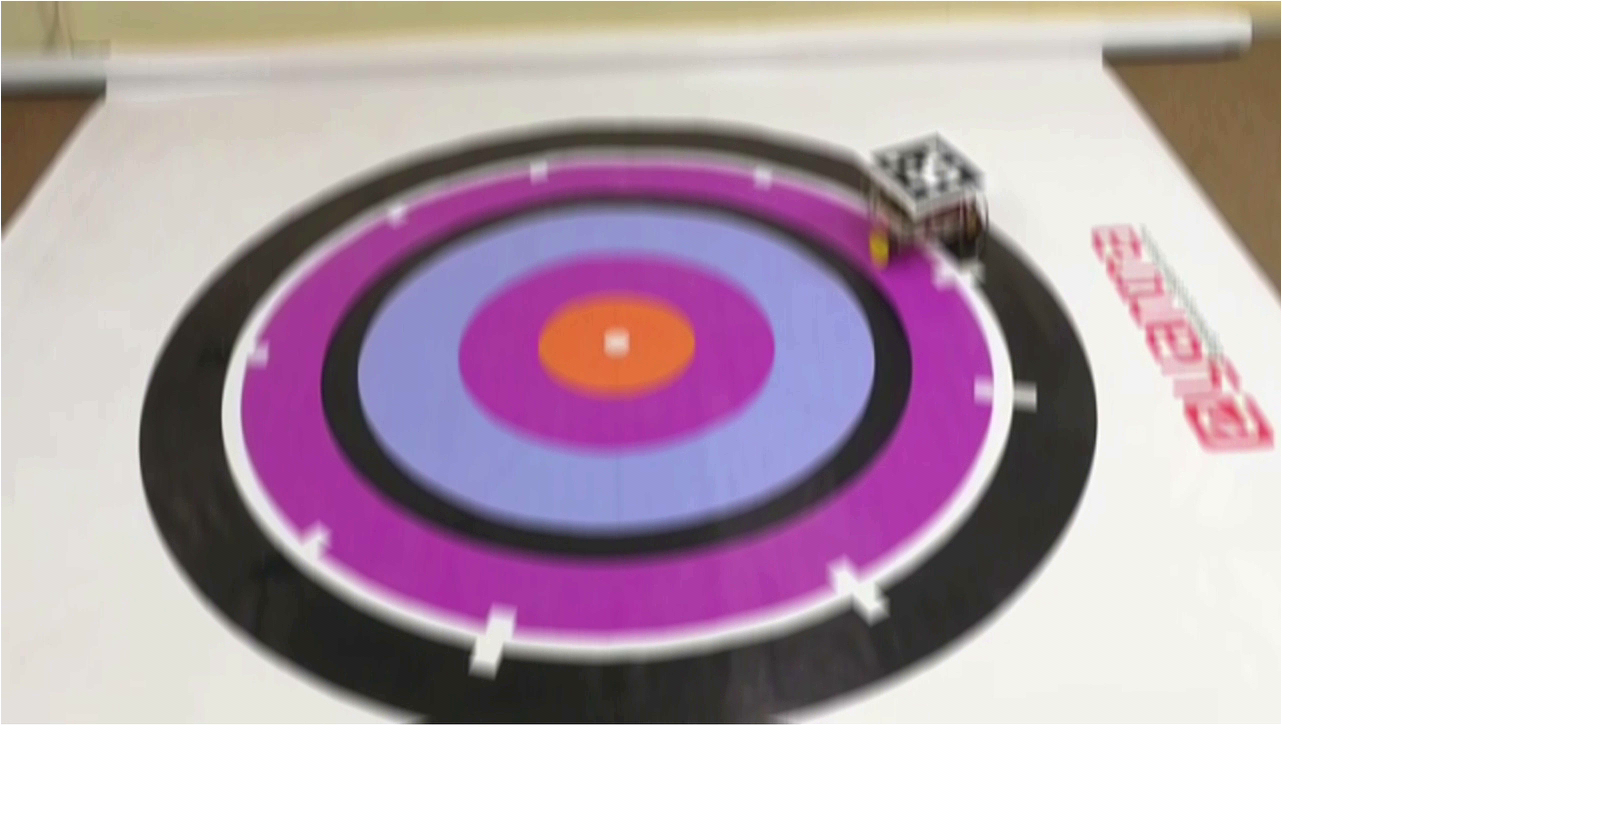

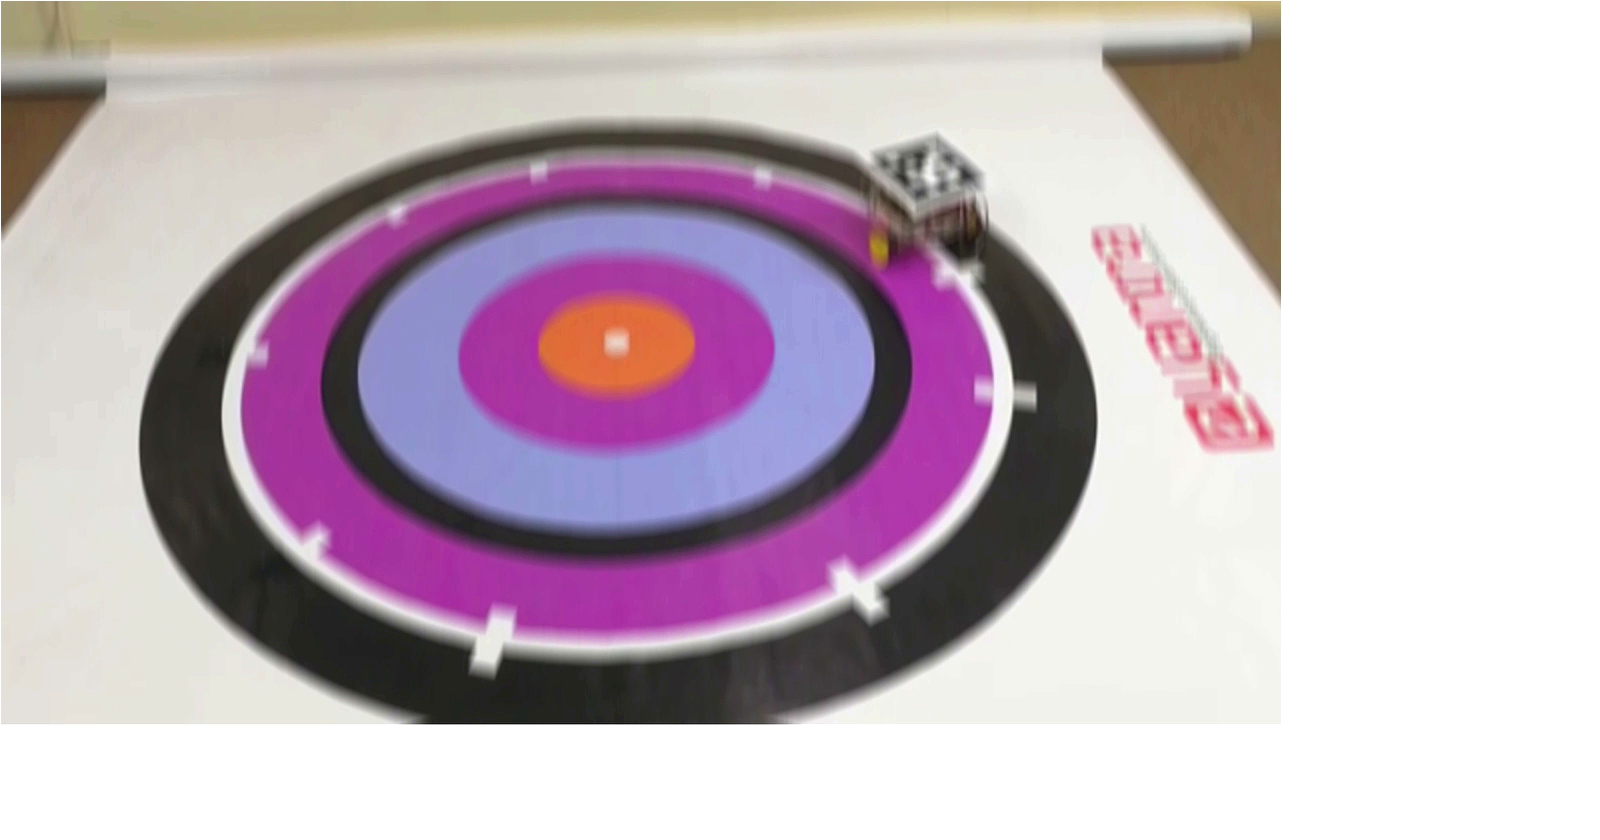

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#radius of the trunc filter, max=400 as images are 800x800
r = 10

kernel_filename = 'a.png'
h = cv2.imread(kernel_filename,0)
image_filename = 'screenshot+contrast.png'
img_bgr = cv2.imread(image_filename,1)
restored = np.zeros(img_bgr.shape)
for i in range(3):
        #for each channel (R,G,B)
        #read image and compute FFT
        g = img_bgr[:,:,i]
        G = np.fft.fftshift(np.fft.fft2(g))

        #2. pad kernels with zeros and compute fft
        h = cv2.imread(kernel_filename,0)
        h_padded = np.zeros(g.shape) 
        h_padded[:h.shape[0],:h.shape[1]] = np.copy(h)
        H =  np.fft.fftshift(np.fft.fft2(h_padded))
        # normalize to [0,1]
        H_norm = H/abs(H.max())
        G_norm = G/abs(G.max())
        F_temp = G_norm/H_norm
        F_norm = F_temp/abs(F_temp.max())

          #rescale to original scale
        F_hat  = F_norm*abs(G.max())

        #4. use restored image inside a circle of radius r and degraded image outside it
        circle_img = np.zeros(g.shape)
        cv2.circle(circle_img,(g.shape[0]//2,g.shape[1]//2),r,1,thickness=-1)
        inner_F_hat = circle_img*F_hat
        circle_img = 1 - circle_img
        outer_G = circle_img*G

        #5. take ifft
        f_hat = np.fft.ifft2( np.fft.ifftshift(inner_F_hat + outer_G) ) 
        #f_hat = np.fft.ifft2( np.fft.ifftshift(F_hat) )
        restored[:,:,i] = abs(f_hat)
cv2_imshow(restored)
cv2_imshow(img_bgr)